<h1 style="color: white; 
    font-size: 46px; 
    text-align: center; 
    background: #00ffcc; 
    padding: 30px; 
    ">Text Generation - Poetry</h1>

In [2]:
#!pip install tensorflow==2.0.0-alpha0 

import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

# Load the data

In [4]:
DATA_URLS = ['https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt']
DIR_NAME = 'sonnets'
    
DATA_FILE_EXT = '.txt'
DATA_DIR_PATH = './data/' + DIR_NAME

In [5]:
# !pip install wget

import os
import wget

def download_wget(URLS, FILE_EXT, DIR_PATH):
    for url in URLS:
        target_file = url.split('/')[-1]
        if target_file not in os.listdir(DIR_PATH):
            print('Downloading', url)
            wget.download(url, out=DIR_PATH)
            file_path = os.path.join(DIR_PATH, target_file)
            print('\n \nExtracting files from', file_path)
            print('\nDone!')
        else:
            print('Already downloaded', url)


if not os.path.isdir('data'):
    os.mkdir('data')    
    
if not os.path.isdir('data/' + DIR_NAME):
    os.mkdir('data/' + DIR_NAME)              

    
download_wget(DATA_URLS, DATA_FILE_EXT, DATA_DIR_PATH)

100% [..........................................................] 93578 / 93578
 
Extracting files from ./data/sonnets\sonnets.txt

Done!


In [9]:
data = open('./data/sonnets/sonnets.txt').read()

corpus = data.lower().split("\n")

In [10]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [11]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 100, input_length=max_sequence_len-1),
    tf.keras.layers.Bidirectional(LSTM(150, return_sequences = True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(total_words, activation='softmax'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
unified_lstm_3 (UnifiedLSTM) (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 1605)              162105    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
15462/15462 [==============================] - 63s 4ms/sample - loss: 6.9179 - accuracy: 0.0227
Epoch 2/100
15462/15462 [==============================] - 57s 4ms/sample - loss: 6.5005 - accuracy: 0.0219
Epoch 3/100
15462/15462 [==============================] - 59s 4ms/sample - loss: 6.3897 - accuracy: 0.0276
Epoch 4/100
15462/15462 [==============================] - 61s 4ms/sample - loss: 6.2687 - accuracy: 0.0297
Epoch 5/100
15462/15462 [==============================] - 63s 4ms/sample - loss: 6.1805 - accuracy: 0.0358
Epoch 6/100
15462/15462 [==============================] - 62s 4ms/sample - loss: 6.1041 - accuracy: 0.0363
Epoch 7/100
15462/15462 [==============================] - 64s 4ms/sample - loss: 6.0313 - accuracy: 0.0400
Epoch 8/100
15462/15462 [==============================] - 63s 4ms/sample - loss: 5.9526 - accuracy: 0.0454
Epoch 9/100
15462/15462 [==============================] - 63s 4ms/sample - loss: 5.8672 - accuracy: 0.0471
Epoch 10/100
15462/15462 [==

15462/15462 [==============================] - 59s 4ms/sample - loss: 1.4665 - accuracy: 0.7485
Epoch 77/100
15462/15462 [==============================] - 60s 4ms/sample - loss: 1.4493 - accuracy: 0.7504
Epoch 78/100
15462/15462 [==============================] - 59s 4ms/sample - loss: 1.4280 - accuracy: 0.7557
Epoch 79/100
15462/15462 [==============================] - 61s 4ms/sample - loss: 1.4195 - accuracy: 0.7564
Epoch 80/100
15462/15462 [==============================] - 61s 4ms/sample - loss: 1.4016 - accuracy: 0.7607
Epoch 81/100
15462/15462 [==============================] - 58s 4ms/sample - loss: 1.3729 - accuracy: 0.7654
Epoch 82/100
15462/15462 [==============================] - 62s 4ms/sample - loss: 1.3729 - accuracy: 0.7646
Epoch 83/100
15462/15462 [==============================] - 58s 4ms/sample - loss: 1.3548 - accuracy: 0.7667
Epoch 84/100
15462/15462 [==============================] - 58s 4ms/sample - loss: 1.3376 - accuracy: 0.7687
Epoch 85/100
15462/15462 [======

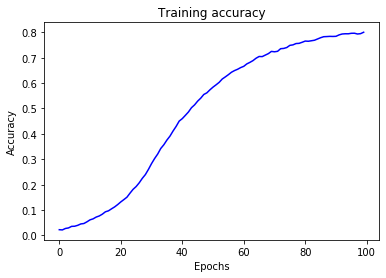

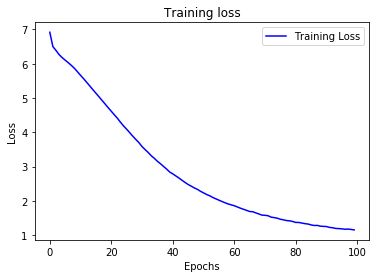

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

# Get the number of epochs
epochs = range(len(acc))

# Plot accuracy per epoch
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training accuracy')

plt.figure()

# Plot loss per epoch
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training loss')

plt.show()

In [18]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope give them that thy budding new rhyme hate of ill bright not skill wrong did stand glory in dwell alone find love's day are live away by stay away things bear things seen worth bright worth so read thee slain twain green thee give thee ill a several did commend impute impute fall did much groan and live in thee in thy part new more must show thee ill twain not green me find thine dearly ill green thee love you be pace hell alone live forth true love am in thine own face 'no ' was life to me
